In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv", index_col = 0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [4]:
import seaborn as sns

%matplotlib inline

/Users/abeljrenteria/miniconda3/envs/MachineLearning/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


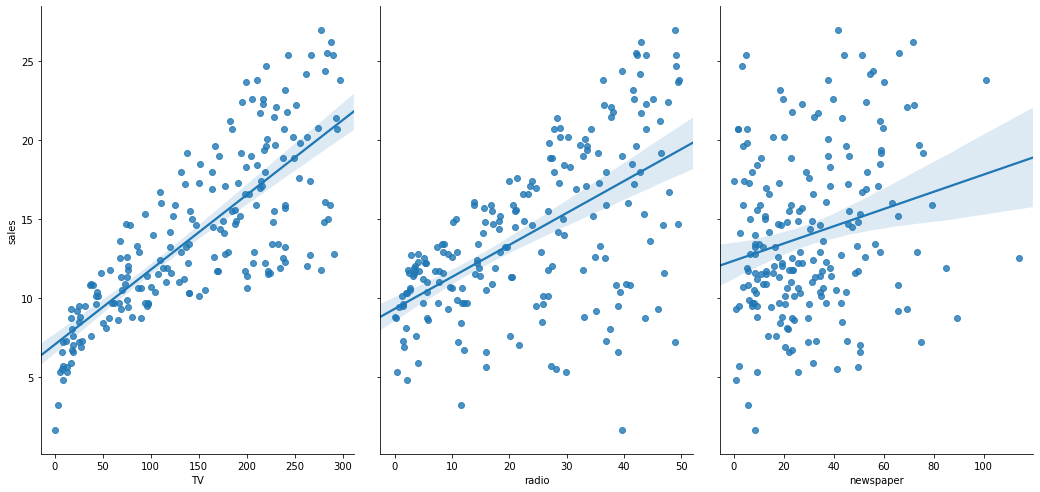

In [5]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

# Linear Regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship b/w the features and response)

## Form of linear regression
 
![alt text](https://render.githubusercontent.com/render/math?math=y%20%3D%20%5Cbeta_0%20%2B%20%5Cbeta_1%20%5Ctimes%20TV%20%2B%20%5Cbeta_2%20%5Ctimes%20Radio%20%2B%20%5Cbeta_3%20%5Ctimes%20Newspaper&mode=inline "Formula")

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!


## Prepare X and y using pandas

In [6]:
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [8]:
# select a series from the df
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [9]:
# check the type and shape of y
print (type(y))
print (y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Split X and y into training/testing sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear Regression in scikit-learn

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 ### Interpreting the model coefficients

In [13]:
# print the intercept and coefficients
print (linreg.intercept_)
print (linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [14]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111804343)]

![alt text](https://render.githubusercontent.com/render/math?math=y%20%3D%202.88%20%2B%200.0466%20%5Ctimes%20TV%20%2B%200.179%20%5Ctimes%20Radio%20%2B%200.00345%20%5Ctimes%20Newspaper&mode=display "Formula")

For the TV coefficient of 0.0466:
* For a given amount of Radio and Newspaper ad spending, a unit increase in TV ad spending is associated with a 0.0466 unit increase in sales. 
* Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

*This is a statement of association, not causation. All we have to model against is ad sales.  

### Predictions

In [15]:
# make prediction on the testing set
y_pred = linreg.predict(X_test)

### Evaluation

For Linear Regression, there are three common evaluation metrics:

* **Mean Absolute Error**(MAE) is the mean of the absolute value of the errors:
![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%201n%5Csum_%7Bi%3D1%7D%5En%7Cy_i-%5Chat%7By%7D_i%7C&mode=display "MAE Formula")

* **Mean Squared Error**(MSE) is the mean of the squared errors:
![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%201n%5Csum_%7Bi%3D1%7D%5En%28y_i-%5Chat%7By%7D_i%29%5E2&mode=display "MSE Formula")

* **Root Mean Squared Error**(RMSE) is the square root of the mean of the squared errors:
![alt text](https://render.githubusercontent.com/render/math?math=%5Csqrt%7B%5Cfrac%201n%5Csum_%7Bi%3D1%7D%5En%28y_i-%5Chat%7By%7D_i%29%5E2%7D&mode=display "RMSE Formula")

Comparing these metrics:
* **MAE** is the easiest to understand, because its the average error.
* **MSE** is more popular than MAE, because MSE 'punishes' larger errors.
* **RMSE** is even more popular then MSE, because RMSE is interpretable in the 'y' units.

In [16]:
import numpy as np
from sklearn import metrics

# using RMSE for our sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


Based on the newspaper vs. sales graph, it seems like there is not a strong linear correlation between the two. So what would happen to our model if we removed the newspaper feature. Would we get a better RMSE? Lets try.

In [17]:
# create a new list of feature names this time excluding 'Newspaper'
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE decreased when we removed Newspaper from our model. Therefore, our new model is performing slightly better than the original one. Thus, it is unlikely that this feature is useful for predicting sales and should be removed from the model. 

## Cross-validation example: feature selection
**Goal:** Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset.

In [20]:
from sklearn.model_selection import cross_val_score

# create a Python list of the three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the df X
X = data[feature_cols]

# use the sales column as the response y
y = data.sales

In [21]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [23]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [24]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [25]:
# 10-fold cross-validation with two features (excluding newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
